<a href="https://colab.research.google.com/github/anshu247/Machine-Learning/blob/master/Clustering%20on%20GDP%20DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLUSTERING

In [39]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=40426c2c943db74311ff9577407a7cf07909d85aade0eb1ab1887eaed80795ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-45zgianp/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport


In [122]:
data=pd.read_csv('/content/GDP.csv')

In [42]:
data.head(4)

,Year,Country,GDP (in USD),GDP Real (in USD),GDP change (%),GDP per capita (in USD),Pop. change (%),Population
0,2017,United States,19485394000000,17348625758200,2.27,53366,0.64,325084756
1,2016,United States,18707189000000,16972347070400,1.49,52543,0.67,323015995
2,2015,United States,18219297000000,16710458234000,2.86,52077,0.69,320878310
3,2014,United States,17521747000000,16242525613600,2.57,50969,0.72,318673411


In [43]:
profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)


In [44]:
#Please check  profile-report for EDA
profile.to_file('EDA.html')

In [45]:
data.columns

Index(['Year', 'Country', 'GDP (in USD)', 'GDP Real (in USD)',
       'GDP change (%)', 'GDP per capita (in USD)', 'Pop. change (%)',
       'Population'],
      dtype='object')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4326 entries, 0 to 4325
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4326 non-null   int64  
 1   Country                  4326 non-null   object 
 2   GDP (in USD)             4326 non-null   int64  
 3   GDP Real (in USD)        4326 non-null   int64  
 4   GDP change (%)           4326 non-null   float64
 5   GDP per capita (in USD)  4326 non-null   int64  
 6   Pop. change (%)          4326 non-null   float64
 7   Population               4326 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 270.5+ KB


# **About Dataset**:
In this dataset there are 8 columns and 4326 rows.

1. Year: tells the respective year
2. Country: tells which country the data is about
3. GDP(in USD):Gross Domestic Product (GDP) is the monetary value of all finished goods and services made within a country during a specific period.
4. GDP Real (in USD): The real GDP is the total value of all of the final goods and services that an economy produces during a given year, accounting for inflation. It is calculated using the prices of a selected base year.


Please look the profiling report all the EDA work have been done there.

**Explaination**:
1. Number of variables	8
2. Number of observations	4326
3. Missing cells	0
4. Missing cells (%)	0.0%
5. Duplicate rows	0
6. Duplicate rows (%)	0.0%

In correlation we have found that GDP(in USD) is correlated to GDP real(in USD) and Population



In [162]:
# Please run this cell
# I have connected By Public Tableau to Python
from IPython.display import IFrame
IFrame('https://public.tableau.com/views/GDP_15995501251690/Dashboard1?:language=en&:display_count=y&publish=yes&:origin=viz_share_link:showVizHome=no&:embed=true', width=1000, height=925)


### **Normalization**

In [48]:
data.columns

Index(['Year', 'Country', 'GDP (in USD)', 'GDP Real (in USD)',
       'GDP change (%)', 'GDP per capita (in USD)', 'Pop. change (%)',
       'Population'],
      dtype='object')

In [123]:
from sklearn.preprocessing import StandardScaler

data.iloc[:,2:] = StandardScaler().fit_transform(data.iloc[:,2:])

In [50]:
data.head(2)


,Year,Country,GDP (in USD),GDP Real (in USD),GDP change (%),GDP per capita (in USD),Pop. change (%),Population
0,2017,United States,15.778149,13.499603,-0.260927,2.298466,-0.570075,2.145652
1,2016,United States,15.138651,13.201253,-0.391965,2.252141,-0.550304,2.130317


###**One Hot encoding**

The Country names do not have an order or rank. But, when label encoding is performed, the country names are ranked based on the alphabets. Due to this, there is a very high probability that the model captures the relationship between countries such as India < Japan < the US.

In [124]:
data=pd.get_dummies(data)

In [52]:
data.head(4)

,Year,GDP (in USD),GDP Real (in USD),GDP change (%),GDP per capita (in USD),Pop. change (%),Population,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cabo Verde,Country_Cambodia,Country_Cameroon,...,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Solomon Islands,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_St. Vincent & Grenadines,Country_State of Palestine,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Tuvalu,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,2017,15.778149,13.499603,-0.260927,2.298466,-0.570075,2.145652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2016,15.138651,13.201253,-0.391965,2.252141,-0.550304,2.130317,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2015,14.737721,12.993603,-0.161809,2.225911,-0.537124,2.114472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2014,14.164502,12.622580,-0.210528,2.163545,-0.517353,2.098128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### **Principle Component Analysis**

In [126]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['1', '2','3','4'])

In [127]:
principalDf.head(2)

,1,2,3,4
0,-11.448172,19.604734,0.726678,1.857711
1,-10.439509,19.020344,0.613377,1.769761


([<matplotlib.axis.XTick at 0x7f783a447ba8>,
 <a list of 4 Text major ticklabel objects>)

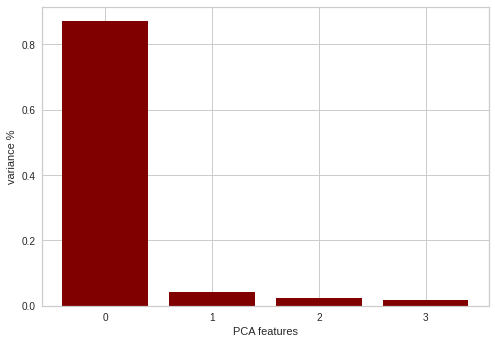

In [128]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='maroon')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

KMEANS:CENTROID BASED TECHNIQUES

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f782fe8ea90>,
                 k=None, metric=None, model=None, timings=True)

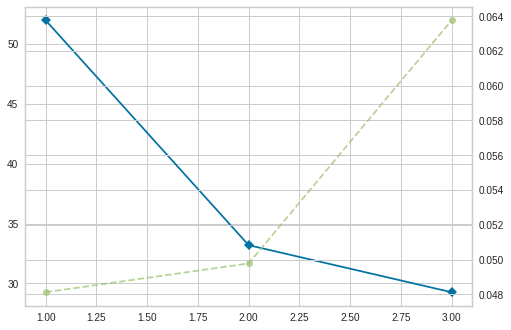

In [129]:
from sklearn.cluster import KMeans
kmeans = KMeans()

from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans,k=(1,4))
visualizer.fit(principalDf)      


## Silhouette_score
##### The Silhouette Coefficient tells us how well-assigned each individual point is.
- If S(i) is close to 0, it is right at the inflection point between two clusters. 
- If it is closer to -1, then we would have been better off assigning it to the other cluster. 
- If S(i) is close to 1, then the point is well-assigned and can be interpreted as belonging to an ‘appropriate’ cluster.

In [130]:
from sklearn.metrics import silhouette_score
cluster_range = list (range(2,5))
for nof_clusters in cluster_range:
    cluster_number = KMeans(n_clusters=nof_clusters)
    prediction = cluster_number.fit_predict(principalDf)
    center = cluster_number.cluster_centers_

    s_score = silhouette_score(principalDf, prediction)
    print("For cluster number = {}, the silhouette score is {})".format(nof_clusters, s_score))

For cluster number = 2, the silhouette score is 0.5641865591680584)
For cluster number = 3, the silhouette score is 0.49737057415523367)
For cluster number = 4, the silhouette score is 0.4413599810340035)


In [131]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init=10, init='k-means++',n_jobs=1)

kmeans.fit(principalDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

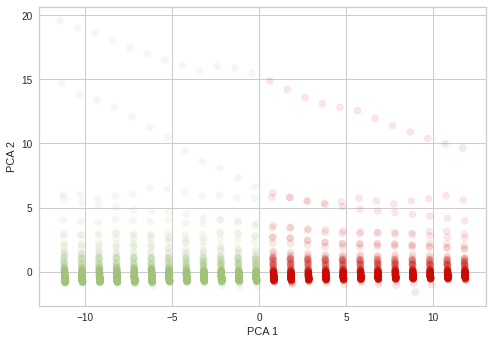

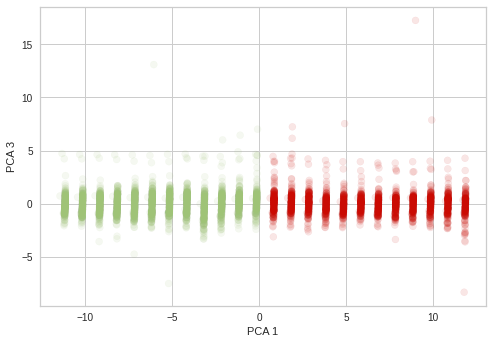

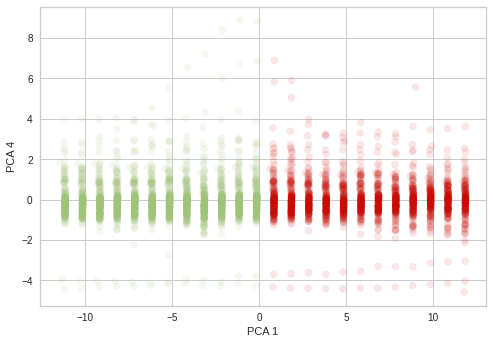

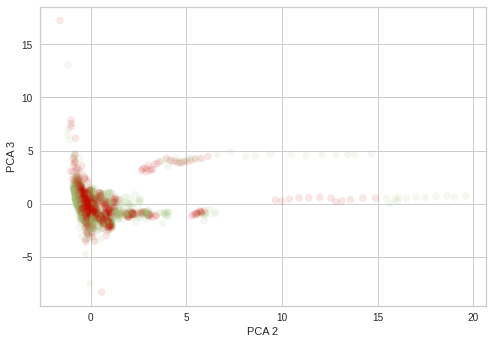

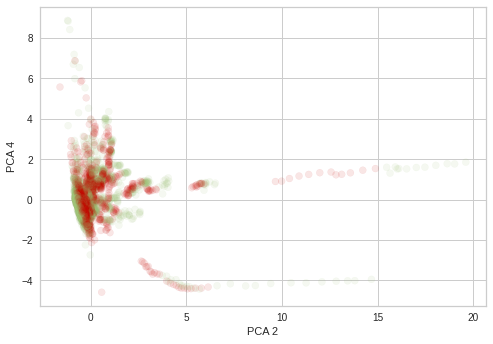

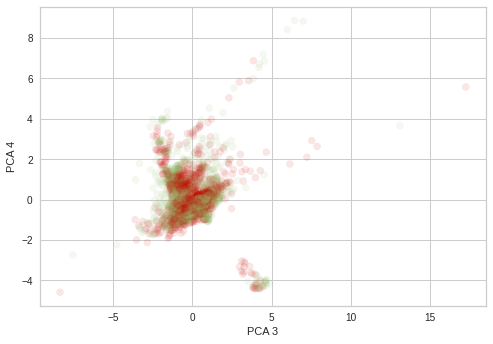

In [141]:
for i in range(0,3):
  for j in range(i+1,4):
    colormap = np.array(['r', 'g'])
    plt.scatter(principalDf.iloc[:,i],principalDf.iloc[:,j], alpha=.1, c=colormap[kmeans.labels_])
    plt.xlabel('PCA {}'.format(i+1))
    plt.ylabel('PCA {}'.format(j+1))
    plt.show()

In [134]:
from sklearn.metrics import davies_bouldin_score 
labels = kmeans.labels_ 
davies_bouldin_score(principalDf, labels)

0.5987954994415451

### Hierarchical clustering

## DB Index
##### DB index shrinks, the clustering is considered ‘better’.

In [135]:
from sklearn.cluster import AgglomerativeClustering

complete = AgglomerativeClustering( affinity='euclidean', linkage='complete')
complete.fit_predict(principalDf)
avg = AgglomerativeClustering( affinity='euclidean', linkage='average')
avg.fit_predict(principalDf)
single = AgglomerativeClustering( affinity='euclidean', linkage='single')
single.fit_predict(principalDf)
ward= AgglomerativeClustering( affinity='euclidean', linkage='ward')
ward.fit_predict(principalDf)

array([0, 0, 0, ..., 1, 1, 1])

In [136]:
from sklearn.metrics import davies_bouldin_score 

# we store the cluster labels 
labels = complete.labels_ 
print(davies_bouldin_score(principalDf, labels))

labels = avg.labels_ 
print(davies_bouldin_score(principalDf, labels))

labels = single.labels_ 
print(davies_bouldin_score(principalDf, labels))

labels = ward.labels_ 
print(davies_bouldin_score(principalDf, labels))

0.603622333333439
0.8876857767256606
0.3120696929581778
0.5927663341048623


In [137]:
complete = AgglomerativeClustering( affinity="manhattan", linkage='complete')
complete.fit_predict(principalDf)
labels = complete.labels_ 
print(davies_bouldin_score(principalDf, labels))


avg = AgglomerativeClustering( affinity='manhattan', linkage='average')
avg.fit_predict(principalDf)
labels = avg.labels_ 
print(davies_bouldin_score(principalDf, labels))

single= AgglomerativeClustering( affinity='manhattan', linkage='single')
single.fit_predict(principalDf)
labels = single.labels_ 
print(davies_bouldin_score(principalDf, labels))



1.0898864581251206
0.8876857767256606
0.3120696929581778


In [138]:
complete = AgglomerativeClustering( affinity="Hamming", linkage='complete')
complete.fit_predict(principalDf)
labels = complete.labels_ 
print(davies_bouldin_score(principalDf, labels))


avg = AgglomerativeClustering( affinity='Hamming', linkage='average')
avg.fit_predict(principalDf)
labels = avg.labels_ 
print(davies_bouldin_score(principalDf, labels))

single= AgglomerativeClustering( affinity='Hamming', linkage='single')
single.fit_predict(principalDf)
labels = single.labels_ 
print(davies_bouldin_score(principalDf, labels))


0.5338064250621191
0.5338064250621191
0.5338064250621191


### Dendrogram for single Linkage

In [96]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(principalDf, "single")
fig = plt.figure()
dn = dendrogram(Z)
plt.show()

KeyboardInterrupt: ignored

In [139]:
print("Number of Clusters fromed in Hierachal Clustering in single linkage are:  ",single.n_clusters)

Number of Clusters fromed in Hierachal Clustering in single linkage are:   2


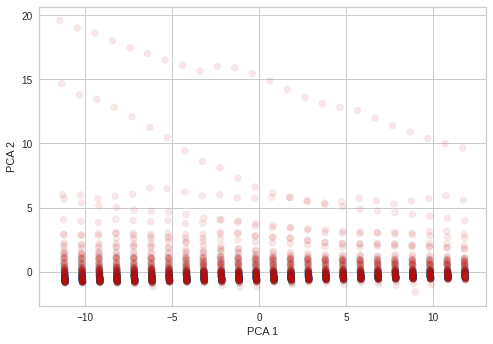

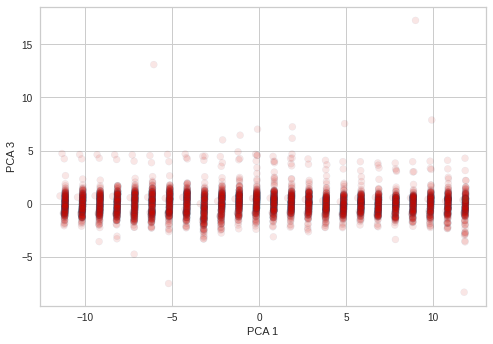

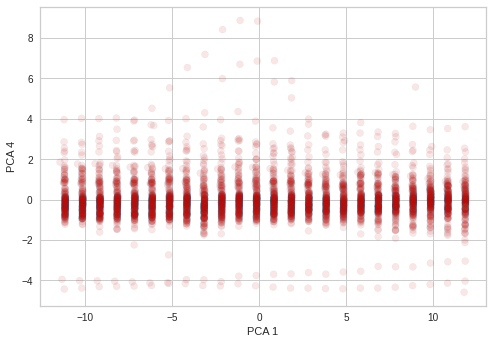

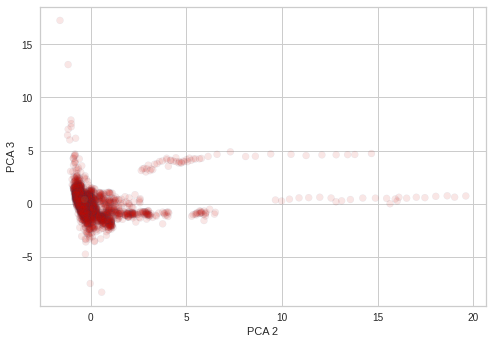

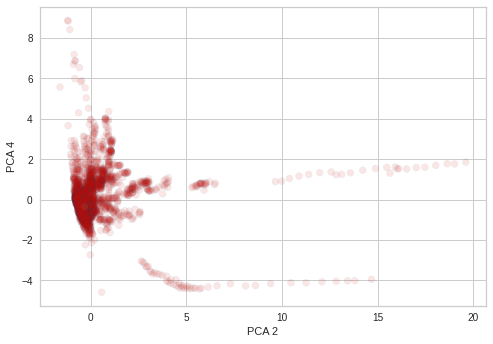

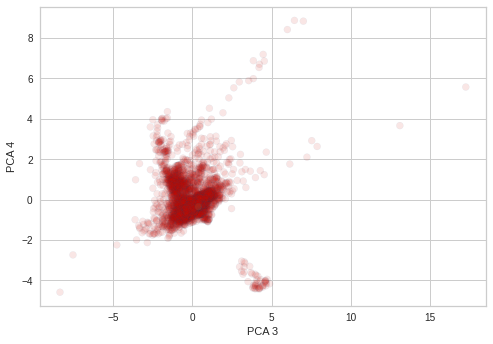

In [142]:
labels = single.labels_ 
for i in range(0,3):
  for j in range(i+1,4):
    colormap = np.array(['r', 'g'])
    plt.scatter(principalDf.iloc[:,i],principalDf.iloc[:,j], alpha=.1,c=colormap[labels], edgecolors = 'b')
    plt.xlabel('PCA {}'.format(i+1))
    plt.ylabel('PCA {}'.format(j+1))
    plt.show()

### **Birch**

In [146]:
from sklearn.cluster import Birch 
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5) 
# Fit the data (Training) 
model.fit(principalDf) 
  
# Predict the same data 
pred = model.predict(principalDf) 
  


In [147]:
print(davies_bouldin_score(principalDf, pred))

0.9298024448814163


In [148]:
model.labels_

array([48, 48, 48, ..., 47, 47, 21])

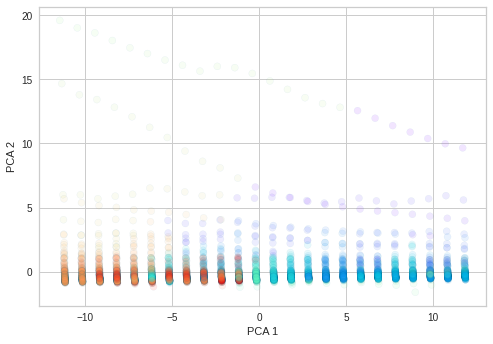

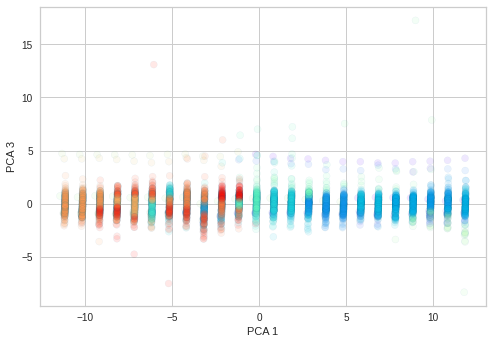

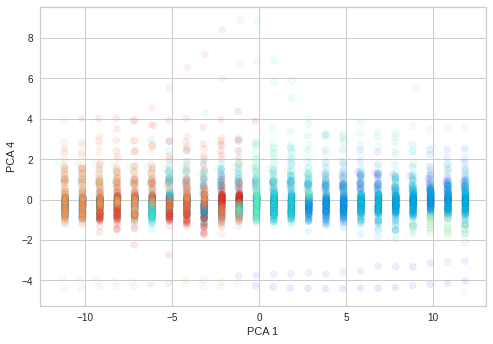

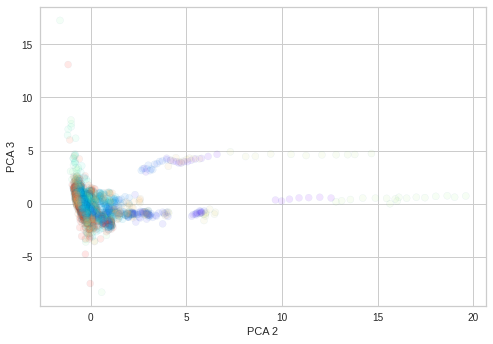

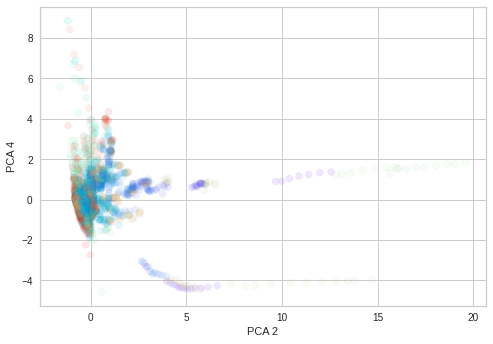

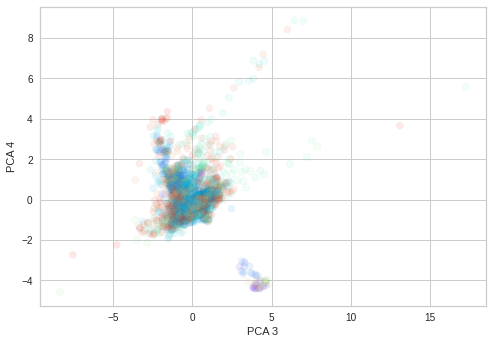

In [151]:


labels = pred
for i in range(0,3):
  for j in range(i+1,4):
    
    plt.scatter(principalDf.iloc[:,i],principalDf.iloc[:,j], alpha=.1,c=labels, cmap = 'rainbow',edgecolors = 'b')
    plt.xlabel('PCA {}'.format(i+1))
    plt.ylabel('PCA {}'.format(j+1))
    plt.show()


### **Density Based Method- DBSCAN**

In [155]:
from sklearn.cluster import DBSCAN 
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(principalDf) 
labels = db_default.labels_ 

In [156]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

In [157]:
print(davies_bouldin_score(principalDf,labels))

1.2296671738427212


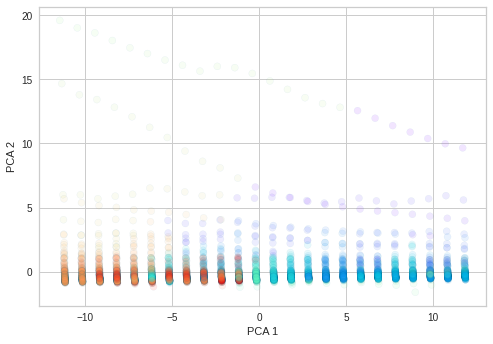

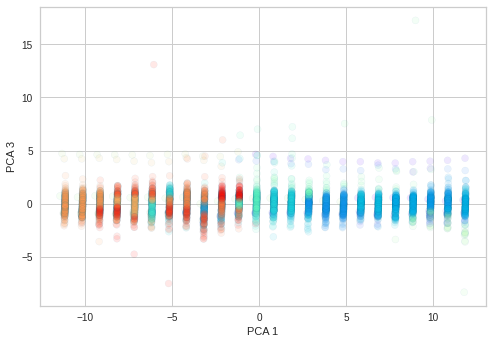

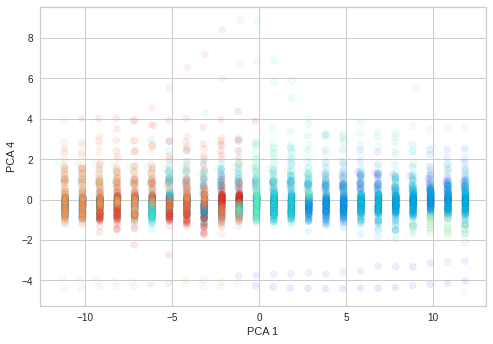

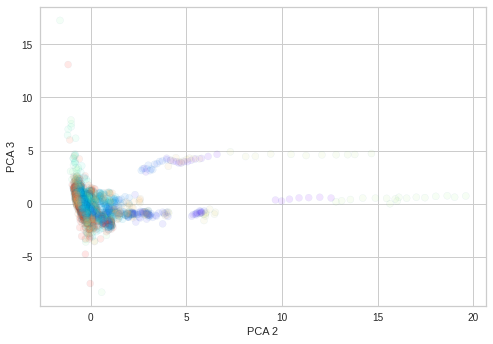

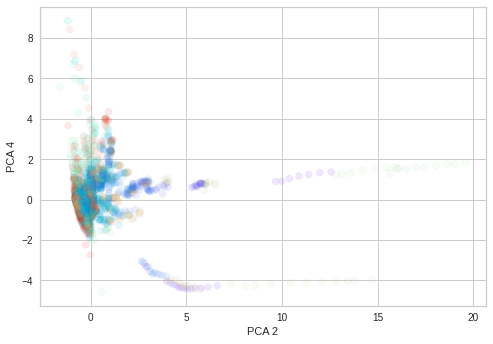

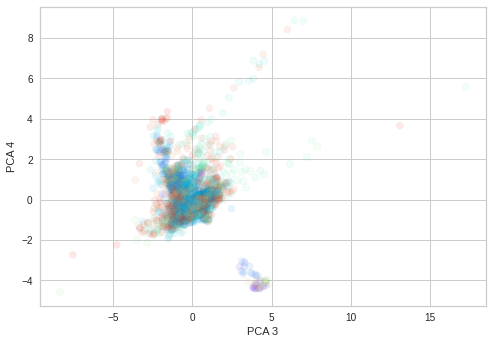

In [158]:
labels = pred
for i in range(0,3):
  for j in range(i+1,4):
    
    plt.scatter(principalDf.iloc[:,i],principalDf.iloc[:,j], alpha=.1,c=labels, cmap = 'rainbow',edgecolors = 'b')
    plt.xlabel('PCA {}'.format(i+1))
    plt.ylabel('PCA {}'.format(j+1))
    plt.show()

### **OPTICS**

In [159]:
from sklearn.cluster import OPTICS
# Building the OPTICS Clustering model 
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05) 
  
# Training the model 
optics_model.fit(principalDf) 
labels=optics_model.labels_

In [160]:
print(davies_bouldin_score(principalDf,labels))

2.192246808576503


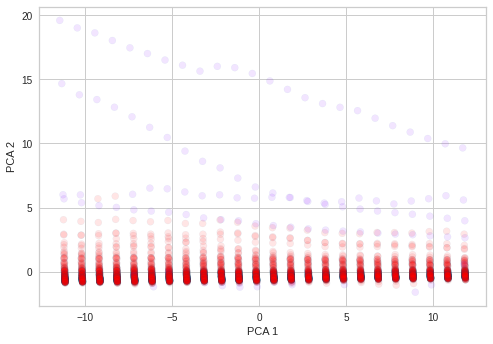

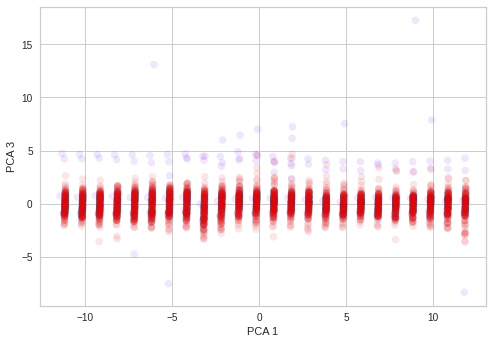

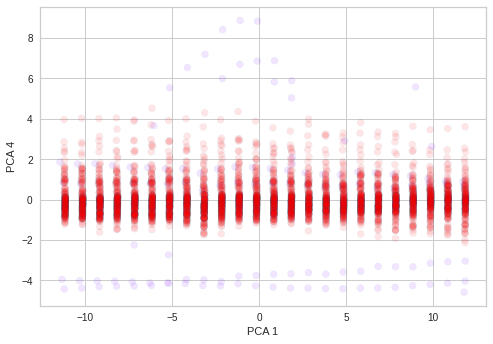

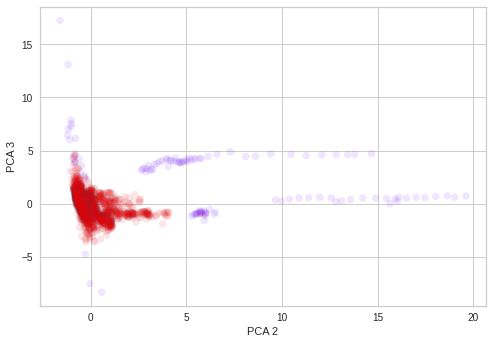

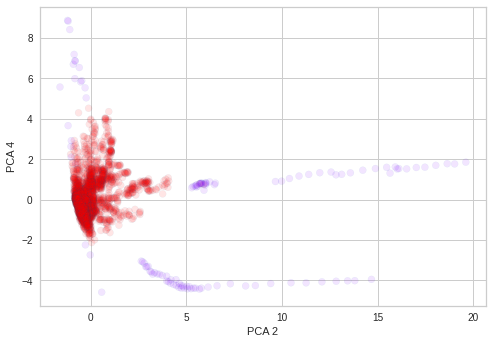

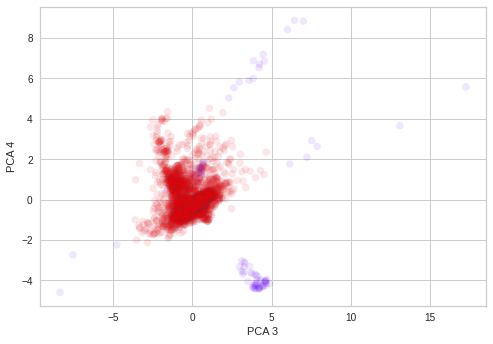

In [161]:
labels = labels
for i in range(0,3):
  for j in range(i+1,4):
    
    plt.scatter(principalDf.iloc[:,i],principalDf.iloc[:,j], alpha=.1,c=labels, cmap = 'rainbow',edgecolors = 'b')
    plt.xlabel('PCA {}'.format(i+1))
    plt.ylabel('PCA {}'.format(j+1))
    plt.show()


Using 2 PCA :
1.   K-Means- 0.54
2.   Hierarchical euclidean distance complete linkage -0.54
3.   BIRCH-0.68
4. DBSCAN- 1.4
5. OPTICS- 1.43

So, on our dataset K-means and Hierarchical is best to apply for 2 PCA

Using 4 PCA :
1.   K-Means- 0.59
2.   Hierarchical euclidean distance single linkage -0.31
3. Hierarchical Manhatten distance  single linkage -0.31
4. Hierarchical Hamming distance  single linkage -0.53
3.   BIRCH-0.92
4. DBSCAN- 1.22
5. OPTICS- 2.1

So, on our dataset Hierarchical clustering with euclidean distance for single linkage  is best to apply for 4 PCA and overall also as DB Index is least



In [163]:
# Please run this cell
# I have connected By Public Tableau to Python
from IPython.display import IFrame
IFrame('https://public.tableau.com/views/GDP1_15995803322840/Sheet5?:language=en&:display_count=y&publish=yes&:origin=viz_share_link:showVizHome=no&:embed=true', width=1000, height=925)